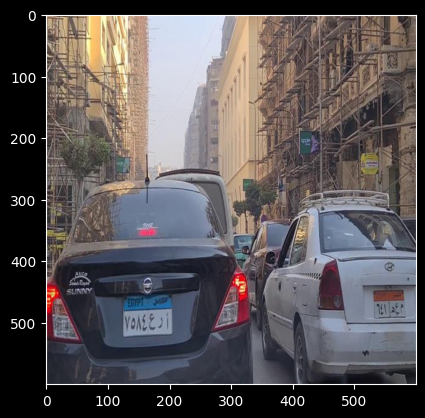

In [1]:
# read the image
# using matplotlib
from matplotlib import image
from matplotlib import pyplot
import numpy as np
# load image as pixel array
imag_pth='images/test2.jpg'
data = image.imread(imag_pth)
# plot image
pyplot.imshow(data)

In [2]:
! yolo task=detect \
mode=predict \
model=Recognizers/colo.pt \
conf=0.25 \
source='images/test2.jpg'

Ultralytics YOLOv8.0.96 🚀 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1650, 3904MiB)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /run/media/ahmed/Hay/Egyptian cars plate recognizer/Egyptian cars plate recognizer/images/test2.jpg: 608x608 4 cars, 7.5ms
Speed: 19.6ms preprocess, 7.5ms inference, 36.8ms postprocess per image at shape (1, 3, 608, 608)
Results saved to runs/detect/predict


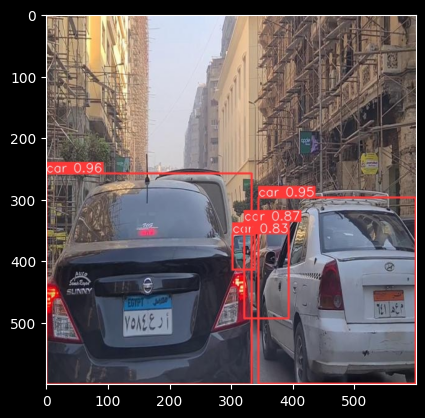

In [3]:
pre = image.imread('runs/detect/predict/test2.jpg')
# plot image
pyplot.imshow(pre)

In [4]:
# read colo model ==> car reconizer using yolov8
from ultralytics import YOLO

colo = YOLO("Recognizers/colo.pt")

In [5]:
cars = colo(data)  # list of Results objects



0: 608x608 3 cars, 7.5ms
Speed: 3.8ms preprocess, 7.5ms inference, 3.5ms postprocess per image at shape (1, 3, 608, 608)


In [6]:
cars

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'car', 1: 'motorbike', 2: 'person'}
 orig_img: array([[[117,  94,  76],
         [148, 125, 107],
         [120,  97,  81],
         ...,
         [102,  89,  80],
         [130, 117, 108],
         [145, 132, 123]],
 
        [[109,  86,  68],
         [135, 112,  94],
         [120,  97,  79],
         ...,
         [134, 121, 112],
         [142, 129, 120],
         [123, 110, 101]],
 
        [[142, 117,  97],
         [154, 129, 109],
         [133, 108,  88],
         ...,
         [133, 120, 111],
         [128, 115, 106],
         [126, 113, 104]],
 
        ...,
 
        [[ 38,  41,  50],
         [ 39,  42,  51],
         [ 40,  43,  52],
         ...,
         [ 38,  41,  46],
         [ 38,  41,  46],
         [ 38,  41,  46]],
 
        [[ 38,  41,  50],
         [ 39,  42,  51],
         [ 40,  

In [7]:
# get cars boxes cars is the 0 class

cars_boxes = cars[0].boxes
cars_boxes

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[338.7350, 293.5525, 599.8859, 599.8126,   0.9443,   0.0000],
        [  2.1090, 261.2087, 333.4471, 599.8731,   0.9299,   0.0000],
        [321.5264, 334.1710, 391.3182, 486.9506,   0.8112,   0.0000]], device='cuda:0')
cls: tensor([0., 0., 0.], device='cuda:0')
conf: tensor([0.9443, 0.9299, 0.8112], device='cuda:0')
data: tensor([[338.7350, 293.5525, 599.8859, 599.8126,   0.9443,   0.0000],
        [  2.1090, 261.2087, 333.4471, 599.8731,   0.9299,   0.0000],
        [321.5264, 334.1710, 391.3182, 486.9506,   0.8112,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: tensor([600, 600], device='cuda:0')
shape: torch.Size([3, 6])
xywh: tensor([[469.3105, 446.6825, 261.1508, 306.2601],
        [167.7780, 430.5409, 331.3380, 338.6644],
        [356.4223, 410.5608,  69.7918, 152.7796]], device='cuda:0')
xywhn: tensor([[0.7822, 0.7445, 0.4353, 0.5104],
        [0.2796, 0.7176, 0.5522, 0.5644],
     

In [8]:
o=0
cars_bounds = []
for i in cars_boxes:
    if i.cls == 0:
        print(i.xywh)
        cars_bounds.append(i.xywh)
        o+=1
print(o)

tensor([[338.7350, 293.5525, 599.8859, 599.8126]], device='cuda:0')
tensor([[  2.1090, 261.2087, 333.4471, 599.8731]], device='cuda:0')
tensor([[321.5264, 334.1710, 391.3182, 486.9506]], device='cuda:0')
3


In [9]:
cars_bounds

[tensor([[469.3105, 446.6825, 261.1508, 306.2601]], device='cuda:0'),
 tensor([[167.7780, 430.5409, 331.3380, 338.6644]], device='cuda:0'),
 tensor([[356.4223, 410.5608,  69.7918, 152.7796]], device='cuda:0')]

In [10]:
# crop the cars from the image and add them to temp folder
import cv2
import os

# Create target Directory if don't exist
if not os.path.exists('temp'):
    os.mkdir('temp')
    print("Directory " , 'temp' ,  " Created ")
else:
    print("Directory " , 'temp' ,  " already exists")
    # remove all files in temp folder
    for filename in os.listdir('temp'):
        file_path = os.path.join('temp', filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

Directory  temp  Created 


In [11]:
# crop the cars from the image and add them to temp folder using xywh
for i in range(len(cars_bounds)):
    x,y,w,h = cars_bounds[i][0]
    #x,y are the center of the box
    x_top_left= int(x - w/2)
    y_top_left= int(y - h/2)
    x_bottom_right= int(x + w/2)
    y_bottom_right= int(y + h/2)
    # crop the image
    crop_img = data[y_top_left:y_bottom_right, x_top_left:x_bottom_right]
    #convert the image to RGB
    crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    # save the image
    cv2.imwrite('temp/car'+str(i)+'.jpg', crop_img)
    



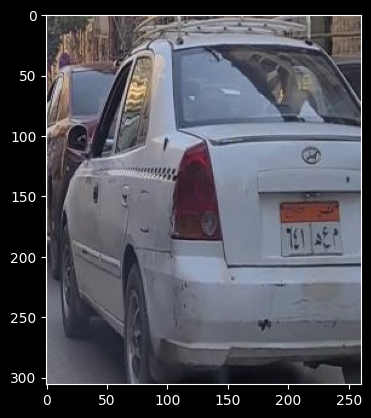

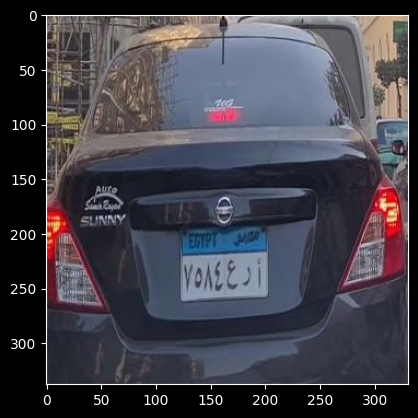

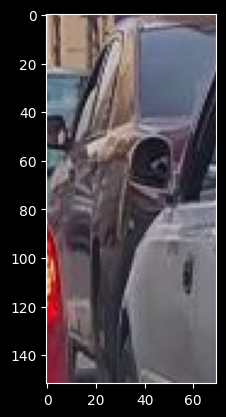

In [12]:
# read the croped images and predict the car model
corped_cars = []
for filename in os.listdir('temp'):
    file_path = os.path.join('temp', filename)
    #print(file_path)
    # load image as pixel array
    data = image.imread(file_path)
    # plot image
    pyplot.imshow(data)
    pyplot.show()
    corped_cars.append(data)
    #print(corped_cars)